In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as web

# reload all changed modules every time before executing a new line.
%load_ext autoreload
%autoreload 2

from Macd import Macd
from Trader import Trader

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
stock_names = ['amzn', 'grpn', 'tsla']
stocks = dict((stock_name, pd.read_csv('./data/'+stock_name+'.us.csv')) for stock_name in stock_names)

# Baseline 1 - Buy once at the earliest, and hold

In [67]:
for stock_name, stock in stocks.items():
    td = Trader(stock)
    strategy = td.buy_once_and_hold(buy_at=stock.shape[0]-601)
    total = td.run(strategy, cash=10000)
    
    print(stock_name.upper(), 'Money before buy_once_and_hold: 10000 after buy_once_and_hold:', total)

AMZN Money before buy_once_and_hold: 10000 after buy_once_and_hold: 25119.499999999996
GRPN Money before buy_once_and_hold: 10000 after buy_once_and_hold: 10346.68
TSLA Money before buy_once_and_hold: 10000 after buy_once_and_hold: 11328.300000000001


# Baseline 2 - MACD

AMZN Money before MACD: 10000 after MACD: 10000.0
GRPN Money before MACD: 10000 after MACD: 10000.0
TSLA Money before MACD: 10000 after MACD: 10000.0


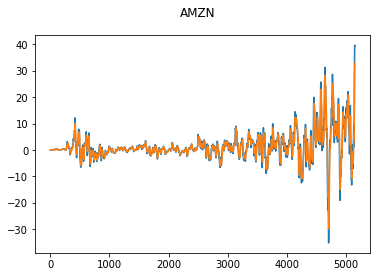

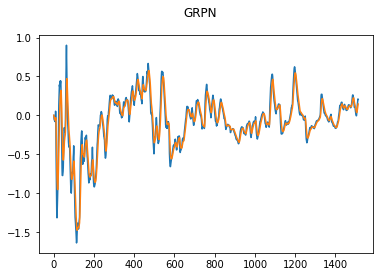

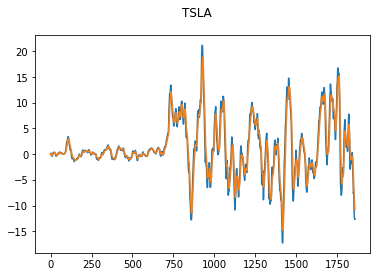

In [68]:
for stock_name, stock in stocks.items():
    mc = Macd()
    macd, signal = mc.macd(stock)
    strategy = mc.predict(stock)
    
    td = Trader(stock)
    total = td.run(strategy, cash=10000
)
    
    print(stock_name.upper(), 'Money before MACD: 10000 after MACD:', total)
    
    plt.figure()
    plt.plot(macd)
    plt.plot(signal)
    plt.suptitle(stock_name.upper())

In [50]:
# read data
amzn = pd.read_csv('./data/amzn.us.csv')
grpn = pd.read_csv('./data/grpn.us.csv')
tsla = pd.read_csv('./data/tsla.us.csv')

In [51]:
for stock in [grpn, amzn, tsla]:
    stock['EMA_12'] = stock['Close'].ewm(span=12,min_periods=0,adjust=True,ignore_na=False).mean()
    stock['EMA_26'] = stock['Close'].ewm(span=26,min_periods=0,adjust=True,ignore_na=False).mean()
    stock['MACD'] = stock['EMA_12'] - stock['EMA_26']
    stock['signal'] = stock['MACD'].ewm(span=9,min_periods=0,adjust=True,ignore_na=False).mean()
    stock['SMA'] = stock['Close'].rolling(30).mean()